# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
   miles  passengers  delay inflight_meal inflight_entertainme

<Figure size 432x288 with 0 Axes>

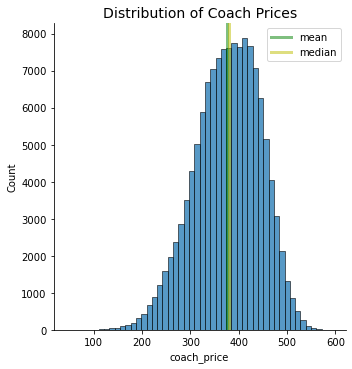

The average price paid for a coach ticket $376.5852530821279
The median price paid for a coach ticket $380.56


<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

## Task 1
# calculate mean and median prices

flight = pd.read_csv("flight.csv")
print(flight.head())

## Task 1
# Create figure
plt.figure()

# set the histogram, mean and median
sns.displot(flight.coach_price, bins=50, kde=False)
plt.axvline(x=flight.coach_price.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=flight.coach_price.median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.title("Distribution of Coach Prices", size=14)
plt.legend(["mean", "median"])

# save figure
plt.savefig("Distribution of Coach Prices with Seaborn.png")
plt.show()
plt.clf()

# average coach price
avg_coach_price = flight.coach_price.mean()
print('The average price paid for a coach ticket $' + str(avg_coach_price))

# median coach price
median_coach_price = flight.coach_price.median()
print('The median price paid for a coach ticket $' + str(median_coach_price))

- For a 500usd coach ticket, it is abit expensive compared to the average price of ticket at 378 usd

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

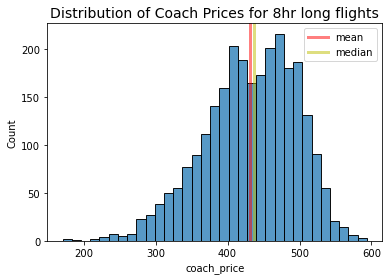

The average price paid for a coach ticket $431.8343773728164
The median price paid for a coach ticket $437.115


<Figure size 432x288 with 0 Axes>

In [2]:
## Task 2
# Create figure
plt.figure()

# coach prices for flights that are 8 are long
coach_8hr = flight.loc[flight.hours == 8]

# set the histogram, mean and median
sns.histplot(coach_8hr.coach_price)
plt.axvline(x=coach_8hr.coach_price.mean(), linewidth=3, color='r', label="mean", alpha=0.5)
plt.axvline(x=coach_8hr.coach_price.median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.title("Distribution of Coach Prices for 8hr long flights", size=14)
plt.legend(["mean", "median"])

# save figure
plt.savefig("Distribution of Coach Prices: 8hr flights with Seaborn.png")
plt.show()
plt.clf()


# average coach price
avg_coach_price = coach_8hr.coach_price.mean()
print('The average price paid for a coach ticket $' + str(avg_coach_price))

# median coach price
median_coach_price = coach_8hr.coach_price.median()
print('The median price paid for a coach ticket $' + str(median_coach_price))


- A 500 dollar ticket seem more reasonable for an 8 hr long flight and also relatively close to average price for that journey

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

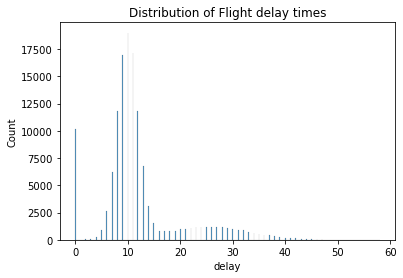

<Figure size 432x288 with 0 Axes>

In [3]:
## Task 3
# Create figure
plt.figure()

# Plot histogram
sns.histplot(flight.delay[flight.delay <=500])
plt.title('Distribution of Flight delay times')
plt.show()
plt.clf()


- 10-minute delay is fairly common for this airline. You may want to keep that in consideration when setting up a connecting flight.

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

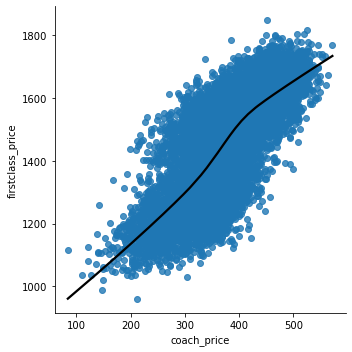

<Figure size 432x288 with 0 Axes>

In [4]:
## Task 4
# Create a scatter plot
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))
 
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()
 

- This line shows the average firstclass price for each coach price. There is a positive linear association between the coach and first class prices. Flights with higher firstclass prices tend to come with higher coach prices.

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

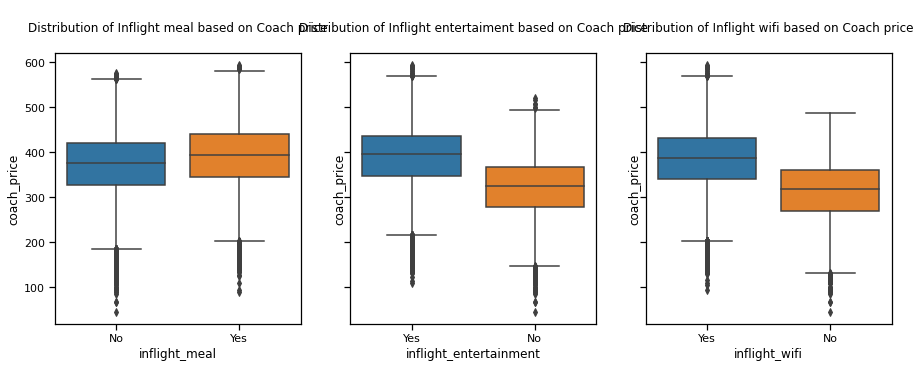

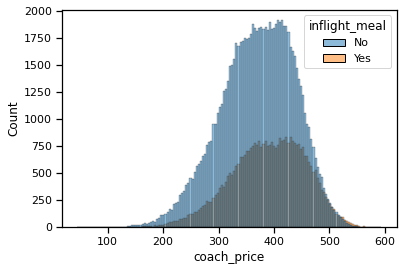

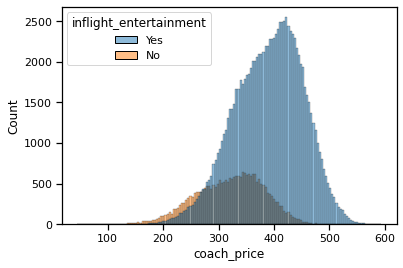

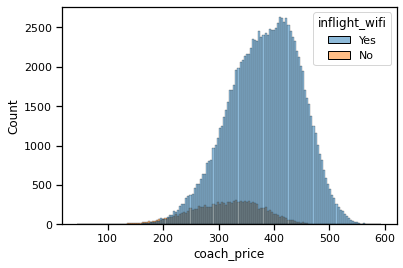

<Figure size 432x288 with 0 Axes>

In [5]:
## Task 5 

# Scaling Plot
sns.set_context("notebook")

# define subplots
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
#fig.suptitle('\nCoach Prices - Inflight Features\n')

# Inflight meal
sns.boxplot(ax=axes[0], x='inflight_meal', y='coach_price', data=flight)
axes[0].set_title('\nDistribution of Inflight meal based on Coach price\n')
# inflight entertainment
sns.boxplot(ax=axes[1], x='inflight_entertainment', y='coach_price', data=flight)
axes[1].set_title('\nDistribution of Inflight entertaiment based on Coach price\n')
# inflight wifi
sns.boxplot(ax=axes[2], x='inflight_wifi', y='coach_price', data=flight)
axes[2].set_title('\nDistribution of Inflight wifi based on Coach price\n')
plt.savefig('Coach Prices - Inflight Features Distributions.png')
plt.show()
plt.clf()

# PLOT HISTOGRAMS
# Inflight Meals
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal, alpha=.5)
plt.show()
plt.clf()

# Inflight Entertainment
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.show()
plt.clf()

# Inflight WiFi
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.show()
plt.clf()

- Inflight entertainment and inflight WiFi tend to come higher coach prices.

6. How does the number of passengers change in relation to the length of flights?

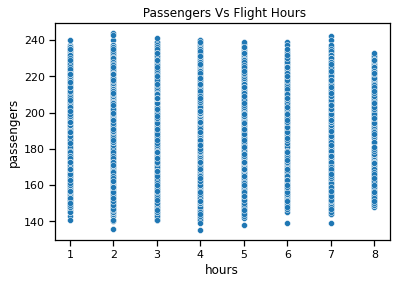

<Figure size 432x288 with 0 Axes>

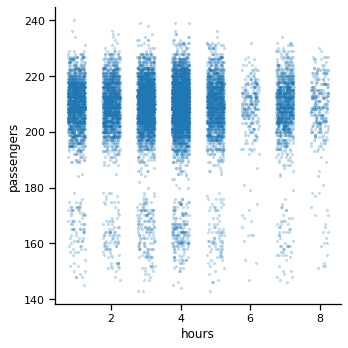

<Figure size 432x288 with 0 Axes>

In [6]:
## Task 6
sns.scatterplot(x=flight.hours, y=flight.passengers).set_title(' Passengers Vs Flight Hours')
plt.show()
plt.clf()

sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()

#print(flight.head())

- we can see that there are significantly fewer data points at 6 and 8 hours compared to the other hours hence fewer passengers on longer flight hours.
- Another thing is that there is a break in the distribution of passengers around 180 (very few flights have around 180 passengers).

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

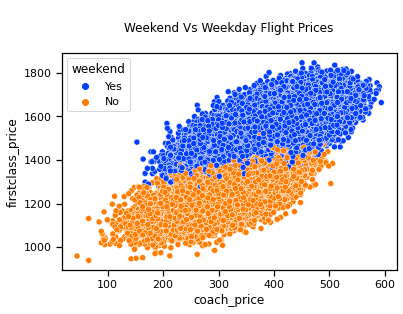

<Figure size 432x288 with 0 Axes>

In [7]:
## Task 7
sns.scatterplot(y='firstclass_price', x='coach_price', hue='weekend', data=flight, palette='bright')
plt.title( '\nWeekend Vs Weekday Flight Prices\n')
plt.show()
plt.clf()

- first class and coach prices have a psitive linear relationship
- first class prices are higher on weekends than on weekdays

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

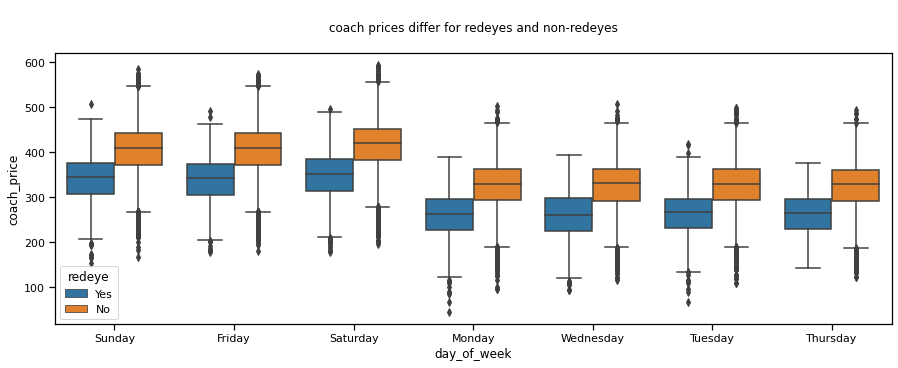

<Figure size 432x288 with 0 Axes>

In [8]:
## Task 8
# set figure
plt.figure(figsize=(15,5))
# set context 
sns.set_context("notebook")
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.title('\ncoach prices differ for redeyes and non-redeyes\n')
plt.savefig('coach prices differ for redeyes and non-redeyes.png')
plt.show()
plt.clf()

- we can see that coach prices are significantly higher for non redeyes for each day of the week however weekend prices for are much higher compared to weekday prices